In [ ]:
'''
The code for generating the majority of the figures in the main text. Some illustrative figures are generated via inkspace manually.

Use the plot environment when ploting the 3D figures, otherwise use the default environment.

Siyuan Mei (mei@bio.lmu.de)
2026-01-03
'''

%load_ext autoreload
%autoreload 2

from itertools import product
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from sklearn.model_selection import ParameterGrid
from sklearn.metrics import confusion_matrix
from statsmodels.stats.multitest import multipletests
from scipy import stats
import pickle as pkl

from HD_utils.defaults import *
from HD_utils.network import *
from HD_utils.matrix import *
from HD_utils.adap_sim_move import *
from HD_utils.adap_sim_stable import *
from HD_utils.comput_property import *
from HD_utils.stat_test import *
from HD_utils.IO import *
import HD_utils.unequalHD as ueHD

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.sans-serif'] = ['Arial']

# Math text in Arial (uses sans-serif STIX fallback)
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['mathtext.bf'] = 'Arial:bold'

axtitle_size = 15.4 * 0.9
figtitle_size = 18 * 0.9
plt.rcParams['axes.titlesize'] = axtitle_size      # Axes title (ax.set_title) -> 12 in krita
plt.rcParams['figure.titlesize'] = figtitle_size    # Figure title (fig.suptitle)  -> 14 in krita

label_size = 12.9 * 0.9
plt.rcParams['axes.labelsize'] = label_size      # X and Y labels -> 10 in krita
plt.rcParams['figure.labelsize'] = label_size

tick_size = 11.6 * 0.9
plt.rcParams['xtick.labelsize'] = tick_size     # X tick labels -> 9 in krita
plt.rcParams['ytick.labelsize'] = tick_size     # Y tick labels
plt.rcParams.update({'font.size': tick_size})

# Fig 1a

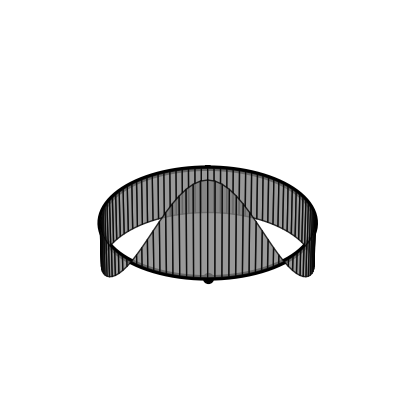

In [2]:
data_num = 101
theta = np.linspace(-np.pi, np.pi, data_num)
J_const = -1
J_scale = 3
kappa = 4
def weight_fun(theta):
    return asym_vw_vonMises(J_const, J_scale, kappa, theta, deltab=0)[:,(data_num-1)//2]


x = np.cos(theta)
y = np.sin(theta)
z = weight_fun(theta)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

ax.fill_between(x,y,z,x,y,0, alpha=0.8, edgecolor='k', facecolors='grey', mode='quad', shade=False)

ax.plot(x, y, 0, color='black', lw=4)

ax.scatter(np.cos(0),np.sin(0),0, marker='o', color='black', s=50, zorder=1000, depthshade=False)

ax.view_init(elev=30, azim=0)

ax.grid(False)
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_ticks([])
    axis.pane.set_visible(False)
    axis.line.set_color((0, 0, 0, 0))

fig.savefig("../../../Pictures/srcfig1_1_classical_ring_attractor_connection.png", dpi=300, bbox_inches='tight', transparent=True)

plt.show()

# Fig 1b

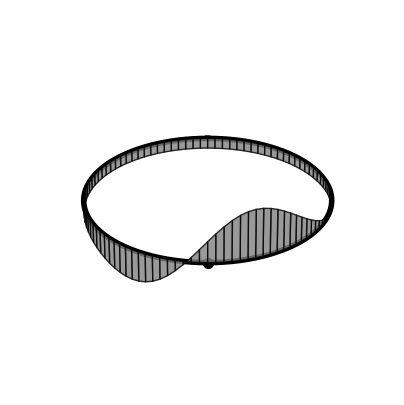

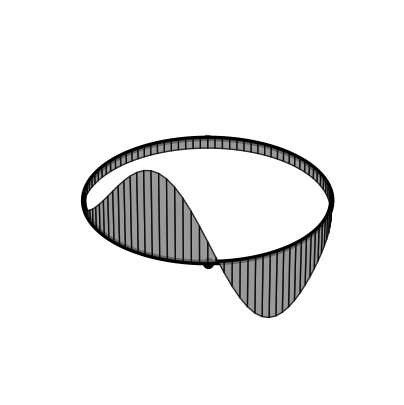

In [ ]:
data_num = 101
theta = np.linspace(-np.pi, np.pi, data_num)
J_const = -1
J_scale = 3
kappa = 4
def weight_fun(theta, v):
    return asym_vw_vonMises(J_const, J_scale, kappa, theta, deltab=v)[:,(data_num-1)//2]
vs = [-1, 2]

x = np.cos(theta)
y = np.sin(theta)
xpos = [0.62,0.39]

for i in range(len(vs)):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(projection='3d')

    z = weight_fun(theta, vs[i])
    ax.fill_between(x,y,z,x,y,0, alpha=0.8, edgecolor='k', facecolors='grey', mode='quad', shade=False, zorder=1)
    ax.scatter(np.cos(0),np.sin(0),0, marker='o', c='black', s=50, zorder=5)
    
    ax.plot(x, y, 0, color='black', lw=4)

    ax.view_init(elev=30, azim=0)

    ax.grid(False)
    for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
        axis.set_ticks([])
        axis.pane.set_visible(False)
        axis.line.set_color((0, 0, 0, 0))
        
    ax.set_zlim(-8,8)
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    
    # ax.set_title(f'$v={vs[i]:.0f}$', x=xpos[i], y=0.52)

    fig.savefig(f"../../../Pictures/srcfig1_2_synaptic_modulation_net_{i}.png", dpi=300, bbox_inches='tight', transparent=True)
    plt.show()

# Fig 1c

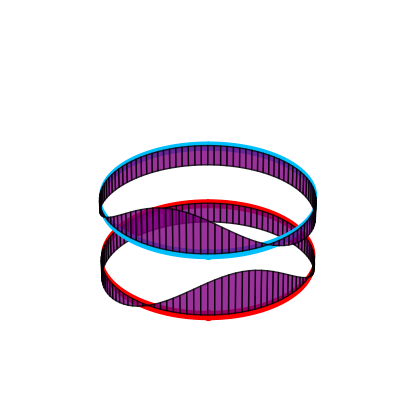

In [ ]:
data_num = 101
theta = np.linspace(-np.pi, np.pi, data_num)
J_const = -1
J_scale = 3
kappa = 3
phi_shift = -np.pi*0.1
def weight_fun(theta, add):
    return vonmises_weight_s(J_const, J_scale, kappa, phi_shift, data_num, theta_range=theta)[:data_num,(data_num-1)//2+add]



a_colors = ['deepskyblue', 'red']
cell_colors = ['deepskyblue', 'red']
a_labels = ['left', 'right']

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

zlimt = 4
ax.set_zlim(-zlimt,zlimt)
baselines = [0,-zlimt/8*6]

for i, add in enumerate([0,data_num]):
    x = np.cos(theta)
    y = np.sin(theta)
    z = weight_fun(theta, add)
    
    ax.fill_between(x,y,baselines[i]-0.2,x,y,baselines[i]+0.2, 
                    edgecolor=cell_colors[i], facecolors=cell_colors[i], mode="polygon", zorder=100)
    ax.fill_between(x,y,z+baselines[i],x,y,baselines[i], alpha=0.8, edgecolor='k', facecolors='purple', mode='quad', shade=False)
    ax.scatter(np.cos(0),np.sin(0),baselines[i], marker='o', c=cell_colors[i], s=50)
    
    
    # ax.plot(x, y, baselines[i], color=cell_colors[i], lw=4)

ax.grid(False)
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_ticks([])
    axis.pane.set_visible(False)
    axis.line.set_color((0, 0, 0, 0))
    


ax.view_init(elev=30, azim=0)
fig.savefig("../../../Pictures/srcfig1_3_input_driven_net_2ring.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# Fig 1d

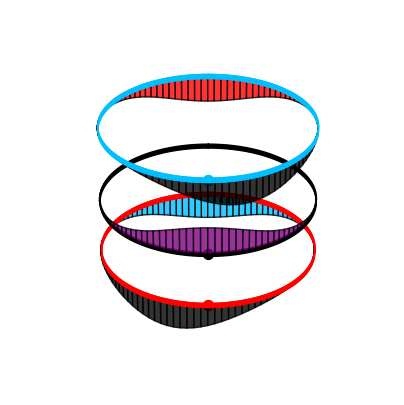

In [ ]:
data_num = 101
theta = np.linspace(-np.pi, np.pi, data_num)
ci = 2.5
ce = 2.5
li = 2.5
kappa = 4
phi_shift = -np.pi*0.1
def weight_fun(theta, add):
    return vonMises_weight_3r_v2(ci, ce, li, kappa, phi_shift+np.pi, theta)[:,(data_num-1)//2+add]

a_colors = ['black', 'deepskyblue', 'red']
cell_colors = ['black', 'deepskyblue', 'red']
# shift = [0,phi_shift/2,-phi_shift/2]
shift = [0,0,0]


blue_rgb = mcolors.to_rgb('deepskyblue') 
red_rgb = mcolors.to_rgb('red')          
mixed_rgb = tuple((b + r) / 2 for b, r in zip(blue_rgb, red_rgb))

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

zlimt = 8
ax.set_zlim(-zlimt,zlimt)
baselines = [0,zlimt/8*7,-zlimt/8*5]

for i, add in enumerate(np.linspace(0,2*data_num, 3).astype(int)):
    atheta = theta + shift[i]
    x = np.cos(atheta)
    y = np.sin(atheta)
    
    zs = weight_fun(theta, add)
    
    for j, add2 in enumerate(np.linspace(0,2*data_num, 3).astype(int)):
        
        if (i == j) | ((i == 0) & (j > 1)):
            continue
        
        z = zs[add2:data_num+add2]
        acolor = 'purple' if (i == 0) & (j ==1) else a_colors[j]
        alpha_val = 0.8 if (i == 0) & (j ==1) else 0.8
        
        ax.scatter(np.cos(shift[i])-0.001,np.sin(shift[i]),baselines[i], marker='o', c=cell_colors[i], s=50)
        ax.fill_between(x,y,z+baselines[i],x,y,baselines[i], alpha=alpha_val, edgecolor='k', facecolors=acolor, mode='quad', shade=False)
        ax.fill_between(x,y,baselines[i]-0.2,x,y,baselines[i]+0.2, 
                        edgecolor=cell_colors[i], facecolors=cell_colors[i], mode="polygon", zorder=100)

ax.grid(False)
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_ticks([])
    axis.pane.set_visible(False)
    axis.line.set_color((0, 0, 0, 0))

ax.view_init(elev=30, azim=0)
fig.savefig("../../../Pictures/srcfig1_4_input_driven_net_relay.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# Fig 1e

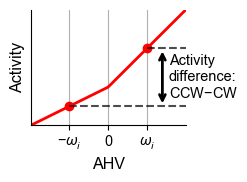

In [2]:
fig, ax = plt.subplots(1,1, figsize=(2,1.5))
point_num = 100

a_xs = np.linspace(-1,1,point_num)
a_ys = np.linspace(-0.3,0.3,point_num) + np.concatenate([np.linspace(0.1,0,point_num//2), np.linspace(0,0.1,point_num//2)])

ax.plot(a_xs, a_ys, color='red', lw=2)

# Calculate y values at x = -0.5 and x = 0.5
y_at_neg_half = np.interp(-0.5, a_xs, a_ys)
y_at_pos_half = np.interp(0.5, a_xs, a_ys)
ax.plot([-0.5,0.5], [y_at_neg_half, y_at_pos_half], color='red', marker='o', ls='')

# Add horizontal lines to show the y values
ax.axhline(y=y_at_neg_half, xmin=0.25, xmax=1, color='black', linestyle='--', alpha=0.7)
ax.axhline(y=y_at_pos_half, xmin=0.75, xmax=1, color='black', linestyle='--', alpha=0.7)

# Add arrow showing the difference
ax.annotate('', xy=(0.7, y_at_pos_half), xytext=(0.7, y_at_neg_half),
            arrowprops=dict(arrowstyle='<->', color='black', lw=2))

ax.text(0.78, (y_at_pos_half + y_at_neg_half)/2, 
        'Activity\ndifference:\nCCW$-$CW', 
        rotation=0, va='center', ha='left', color='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()

ax.set_xticks([-0.5,0, 0.5], ['$-\\omega_i$', 0, '$\\omega_i$'])
ax.set_xlabel('AHV')

ax.set_yticks([])
ax.set_ylabel('Activity') 

ax.set_xlim(-1,1)
ax.set_ylim(-0.2, 0.4)

fig.savefig("../../../Pictures/srcfig1_6_two_net_prediction_calculations.png", dpi=300, bbox_inches='tight')
plt.show()

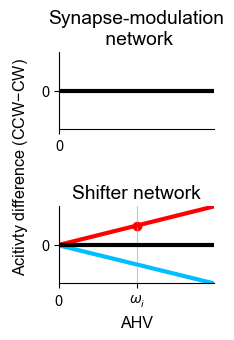

In [3]:
a_colors = ['black', 'deepskyblue', 'red']
a_labels = ['Relay', 'Left', 'Right']

fig, axes = plt.subplots(2,1, figsize=(2,3))
point_num = 100
a_xs = np.linspace(0,1,point_num)

ax = axes[0]
ax.set_title('Synapse-modulation\n network')

a_ys = np.zeros(point_num)
ax.plot(a_xs, a_ys, color='black', lw=3)

fig.supylabel('Acitivty difference (CCW$-$CW)', x=-0.12)

ax = axes[1]
ax.set_title('Shifter network')

a_2ys = np.linspace(-0.004,-0.3,point_num)
a_3ys = np.linspace(0,0.3,point_num)
a_yss = [a_ys, a_2ys, a_3ys]
shorters =[0,1,1]
for j in [1,2,0]:
    ax.plot(a_xs[shorters[j]:], a_yss[j][shorters[j]:], color=a_colors[j], label=a_labels[j], lw=3)
ax.set_xlabel('AHV')

acv_diff = np.interp(0.5, a_xs, a_3ys)
ax.scatter([0.5], [acv_diff], color='red', marker='o')
ax.grid(True, alpha=0.7)


for ax in axes:
    # ax.set_xlabel('AHV')
    ax.set_yticks([0])
    ax.set_xticks([0])
    ax.set_xlim(0,1)
    ax.set_ylim(-0.3,0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    
ax.set_xticks([0,0.5], ['$0$', '$\\omega_i$'])

plt.subplots_adjust(hspace=1)
fig.savefig("../../../Pictures/srcfig1_6_two_net_prediction.png", dpi=300, bbox_inches='tight')
plt.show()

# Fig 2d

In [4]:
# Data
dataframe = pd.read_csv(FLY_RESULT_PATH / 'data_PB_roi.csv')
stat_df = pd.read_csv(FLY_RESULT_PATH / "lm_PB_roi_netcosdif.csv")

angVel_bin_edge = np.arange(-150, 151, 20) / 180 * np.pi
dataframe['angVel_bin'] = np.digitize(dataframe.angVel, angVel_bin_edge)

# Subtract the part of the activity modulated by preferred HD from the activity
fly_ids = stat_df['fly_id'].unique()
roi_ids = stat_df['roi_id'].unique()
dataframe['cos_diff'] = np.cos(dataframe['netPhase'] - dataframe['preferred_angle'])
for fly_id, roi_id in product(fly_ids, roi_ids):
    beta3 = stat_df.loc[(stat_df['fly_id'] == fly_id) & (stat_df['roi_id'] == roi_id), 'beta3'].values[0]
    select = (dataframe['fly_id'] == fly_id) & (dataframe['roi_id'] == roi_id)
    dataframe.loc[select, 'activity_subtract'] = dataframe.loc[select, 'activity'] - beta3 * dataframe.loc[select, 'cos_diff']

# select data for plotting
dataframe_plot = dataframe[(dataframe['gain'].isin(['Dark', '1x']))].copy()
dataframe_plot.loc[dataframe_plot['cell_type'].isin(['EPG_L', 'EPG_R']), 'cell_type'] = 'EPG'

acv_summary = dataframe_plot.groupby(['fly_id', 'cell_type', 'angVel_bin']).agg({'activity_subtract': 'mean'}).reset_index()
acv_summary['cell_type_s'] = acv_summary.cell_type.copy()
acv_summary.loc[acv_summary['cell_type_s'].isin(['PEN_L', 'PEN_R']), 'cell_type_s'] = 'PEN'

dataframe_plot['cell_type_s'] = dataframe_plot.cell_type.copy()
dataframe_plot.loc[dataframe_plot['cell_type_s'].isin(['PEN_L', 'PEN_R']), 'cell_type_s'] = 'PEN'
acv_sum2 = dataframe_plot.loc[dataframe_plot.angVel_bin == 8].groupby(['fly_id', 'cell_type_s']).agg({'activity_subtract': 'mean'}).reset_index()

acv_summary = pd.merge(acv_summary, acv_sum2, on=['fly_id', 'cell_type_s'], how='left', suffixes=('', '_mean'))
acv_summary['norm_acv'] = acv_summary['activity_subtract'] / acv_summary['activity_subtract_mean']

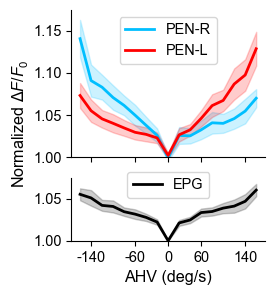

In [ ]:
y1range = [1,1.175]
y2range = [1,1.075]
acv_summary.cell_type.replace({'PEN_L': 'PEN-R', 'PEN_R': 'PEN-L'}, inplace=True)
color_mapping = {'PEN-R': 'deepskyblue', 'PEN-L': 'red', 'EPG': 'Black'}

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(2.5, 3), height_ratios=[y1range[-1]-1, y2range[-1]-1], sharex=True)

ax = axes[0]
sns.lineplot(data=acv_summary.loc[acv_summary.cell_type_s == 'PEN'], x='angVel_bin', y='norm_acv', hue='cell_type', errorbar='se', n_boot=1000, ax=ax, palette=color_mapping, lw=2, legend=True)
ax.set_ylim(y1range)
ax.set_ylabel('')

ax = axes[1]
sns.lineplot(data=acv_summary.loc[acv_summary.cell_type_s == 'EPG'], x='angVel_bin', y='norm_acv', hue='cell_type', errorbar='se', ax=ax, palette=color_mapping, lw=2, legend=True)
ax.set_ylim(y2range)
ax.set_ylabel('')
ax.set_yticks([1, 1.05])

ax.set_xlabel('AHV (deg/s)')
ax.set_xticks([1, 5, 8, 11, 15], [-140, -60, 0, 60, 140])

fig.supylabel('Normalized $\\Delta F/F_0$', x=-0.12)

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(loc='upper center')
    
axes[1].legend(loc='upper center', bbox_to_anchor=(0.5,1.2))

fig.savefig("../../../Pictures/srcfig2_1_acv_on_AHV.png", dpi=300, bbox_inches='tight')
plt.show()

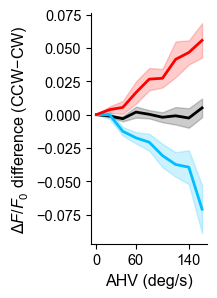

In [ ]:
for i in range(8,17):
    df = acv_summary
    bol_p = acv_summary.angVel_bin == i
    bol_n = acv_summary.angVel_bin == 16-i
    try:
        df.loc[bol_p,'acv_diff'] = df.loc[bol_p, 'norm_acv'].values - df.loc[bol_n, 'norm_acv'].values
    except: # if some fly don't have velocity at a specific AHV
        for flyi in df.fly_id.unique():
            fly_bol = df.fly_id == flyi
            try:
                df.loc[bol_p & fly_bol, 'acv_diff'] = df.loc[bol_p & fly_bol, 'norm_acv'].values - df.loc[bol_n & fly_bol, 'norm_acv'].values
            except:
                pass
    acv_summary = df
    
acv_summary.cell_type.replace({'PEN_L': 'PEN-R', 'PEN_R': 'PEN-L'}, inplace=True)
color_mapping = {'PEN-R': 'deepskyblue', 'PEN-L': 'red', 'EPG': 'Black'}

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(1.5, 3))

sns.lineplot(data=acv_summary.loc[acv_summary.angVel_bin >= 8], x='angVel_bin', y='acv_diff', hue='cell_type', errorbar='se', n_boot=1000, ax=ax, palette=color_mapping, lw=2, legend=False)

ax.set_ylabel('$\\Delta F/F_0$ difference (CCW$-$CW)')

ax.set_xlabel('AHV (deg/s)')
ax.set_xticks([8, 11, 15], [0, 60, 140])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.legend(loc='lower left')

fig.savefig("../../../Pictures/srcfig2_1_acv_diff_on_AHV.png", dpi=300, bbox_inches='tight')
plt.show()

# Fig 2e

In [ ]:
# Simulation theta precision
theta_num = 50
dtheta = (2*np.pi)/theta_num
theta_range = np.arange(-np.pi+dtheta/2, np.pi, dtheta) # must use np.arange(-np.pi+dtheta/2, np.pi, dtheta) to make it symmetry
# Changeable parameters
ring_num = 3
actfun = max0x
weight_fun = cos_weight_3r_Icos_s
search_pars = {'CI': np.linspace(2,20,10), 'CE': np.linspace(2,20,10), 'LI': np.linspace(0,5,11)}
file_pre_name = '65_3'
# Default parameters
inputs = np.array([-1, -0.6, -0.3, -0.1, 0, 0.1, 0.3, 0.6, 1])
net_diff_equa = net_diff_equa_f_in
alpha = -1/9*np.pi
tau = 20 # ms
bE = 5
bI = 0
# Fixed parameters
par_num = len(search_pars)
search_num = len(ParameterGrid(search_pars))
zeroid = np.where(inputs == 0)[0][0]
par_names = list(search_pars.keys())

Vels, network_eval_moving, network_eval_moving_des, network_acvs_moving, network_ts_moving, network_eval_moving_sum = load_pickle(
    ['moving_slope', 'moving_eval', 'moving_eval_des', 'moving_acvs', 'moving_ts', 'moving_eval_sum'], weight_fun, actfun, file_pre_name)

network_evals, network_evaldes, network_acvs, network_pars, network_ts = load_pickle(
    ['evals', 'eval_des', 'acvs', 'pars', 'ts'], weight_fun, actfun, "63_3_1_copy")
valid_index_s = np.where(network_evals == 'valid')[0]
valids_num = len(valid_index_s)

stable_mov_range, stable_mov_range_id, linear_mov_range, linear_mov_range_id = \
    cal_linear_range(network_eval_moving, Vels, inputs, valid_index_s)
valid_index_linear_move = np.where(np.diff(linear_mov_range_id, axis=1) == 8)[0]

uf_mm3 = np.zeros((4, search_num, len(inputs), 3)) # mean_u, max_u, mean_f, max_f
for valid_id in valid_index_linear_move:
    for ratioi, ratiov in enumerate(inputs):
        anet_acv = network_acvs_moving[valid_id, ratioi][:,:,-1] # (ring, cell)
        
        bE_change = bE * (1 + abs(ratiov))
        b = steady_inputb_withb0_3r(bE_change, bI, ratiov, theta_num).reshape((3, theta_num))
        anet_acv += b

        
        uf_mm3[0,valid_id, ratioi] = np.mean(anet_acv, axis=1)
        uf_mm3[1,valid_id, ratioi] = np.max(anet_acv, axis=1)
        uf_mm3[2,valid_id, ratioi] = np.mean(actfun(anet_acv+b), axis=1)
        uf_mm3[3,valid_id, ratioi] = np.max(actfun(anet_acv+b), axis=1)

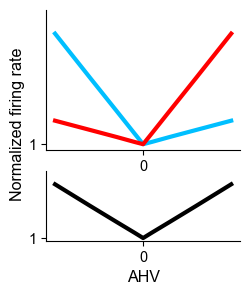

In [ ]:
ring3_id = 662

a_colors = ['black', 'deepskyblue', 'red']
a_labels = ['Relay', 'Left', 'Right']

fig, axes = plt.subplots(2,1, figsize=(2.5,3), height_ratios=(2,1))
fig.supylabel('Normalized firing rate', x=-0.02)

ax = axes[0]
# ax.set_title('Shifter network', y=1.1)

for j in [1,2]:
    data_plot = uf_mm3[2,ring3_id,:,j].copy()
    ax.plot(inputs, data_plot/data_plot[4], color=a_colors[j], label=a_labels[j], lw=3)


ax = axes[1]
ax.set_xlabel('AHV')


data_plot = uf_mm3[2,ring3_id,:,0].copy()
ax.plot(inputs, data_plot/data_plot[4], color=a_colors[0], label=a_labels[0], lw=3)

    
for ax in axes:
    ax.set_yticks([1])
    ax.set_xticks([0])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ylimit = ax.get_ylim()
    ax.set_ylim(ylimit[0],ylimit[1]*1.1)

# fig.subplots_adjust(hspace=0.2)
# plt.tight_layout()
fig.savefig("../../../Pictures/srcfig2_2A_ACV_on_AHV.png", dpi=300, bbox_inches='tight')
plt.show()

# Fig 2f

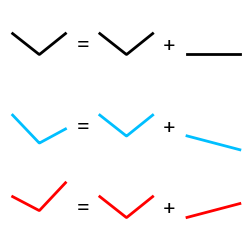

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(3,3))

for ax in axes.flatten():
    ax.set_yticks([])
    ax.set_xticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # ax.set_ylim(-2.5,2.5)
    
npoints = 101
xs = np.linspace(-1,1, npoints)
y_absvu = np.concatenate([np.linspace(1.5,0,npoints//2+1), np.linspace(0,1.5,npoints//2)])
y_vp = np.linspace(0,1, npoints)
y_vn = np.linspace(0,-1, npoints)

axes[0,0].plot(xs, y_absvu, color='black', lw=2)
axes[0,1].plot(xs, y_absvu, color='black', lw=2)
axes[0,2].plot(xs, np.zeros(npoints), color='black', lw=2)

axes[1,0].plot(xs, y_vn+y_absvu, color='deepskyblue', lw=2)
axes[1,1].plot(xs, y_absvu, color='deepskyblue', lw=2)
axes[1,2].plot(xs, y_vn, color='deepskyblue', lw=2)

axes[2,0].plot(xs, y_vp+y_absvu, color='red', lw=2)
axes[2,1].plot(xs, y_absvu, color='red', lw=2)
axes[2,2].plot(xs, y_vp, color='red', lw=2)

for ax in axes.flatten():
    ptp2 = 3.5 * 0.2
    ax.set_ylim(-1-ptp2, 2.5+ptp2)
    
for ax in axes[:,0]:
    ax.text(1.6, 0, '$=$', va='bottom', ha='center', fontsize=axtitle_size)
    
for ax in axes[:,1]:
    ax.text(1.6, 0, '$+$', va='bottom', ha='center', fontsize=axtitle_size)

plt.subplots_adjust(hspace=0.2, wspace=0.5)
fig.savefig("../../../Pictures/srcfig2_2A2_speed_ahv_add_modu.png", dpi=300, bbox_inches='tight')
plt.show()

# Fig 2g

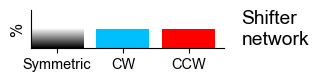

In [ ]:
import numpy as np

fig, ax = plt.subplots(1,1, figsize=(2.5,0.5))

# Add gradient bar on the left (position 0)
bar_width = 0.8
gradient = np.linspace(1,0, 100).reshape(-1, 1)
extent = [0 - bar_width/2, 0 + bar_width/2, 0, 0.5]
ax.imshow(gradient, aspect='auto', extent=extent, cmap='gray', alpha=1.0)
# Add outline for the gradient bar
ax.bar(0, 0.5, width=bar_width, fill=False, edgecolor='black', linewidth=0)

# Original bars (shifted positions to 1 and 2)
plt.bar([1,2], [0.5,0.5], color=['deepskyblue', 'red'])

ax.set_ylim(0,1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([0,1,2], ['Symmetric', 'CW', 'CCW'])  # Added label for new bar
ax.set_yticks([])
ax.set_ylabel('%')

ax.text(2.8,0.5,'Shifter\nnetwork', fontsize=axtitle_size, va='center')
fig.savefig("../../../Pictures/srcfig2_2A3_illustration_prop.png", dpi=300, bbox_inches='tight')
plt.show()

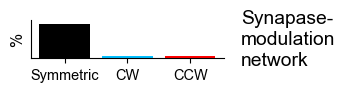

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(2.5,0.5))
plt.bar([1,2,3], [0.9,0.05,0.05], color=['black', 'deepskyblue', 'red'])
ax.set_ylim(0,1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([1,2,3], ['Symmetric', 'CW', 'CCW'])
ax.set_yticks([])
ax.set_ylabel('%')
ax.text(3.8,0.5,'Synapase-\nmodulation\nnetwork', fontsize=axtitle_size, va='center')

fig.savefig("../../../Pictures/srcfig2_2A4_illustration_prop2.png", dpi=300, bbox_inches='tight')
plt.show()

# Fig 2h

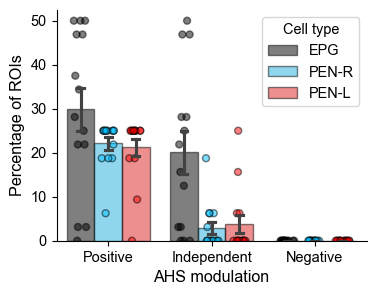

In [ ]:
stat_df = pd.read_csv(FLY_RESULT_PATH / "lm_PB_roi_netcosdif.csv")
stat_df['fly_id'] = stat_df['fly_id'].astype(int)

stat_df.cell_type_s.replace({'PEN_L': 'PEN-R', 'PEN_R': 'PEN-L'}, inplace=True)

beta1_cor_p = multipletests(stat_df['beta1_p'], alpha=0.05, method='bonferroni')[1]
stat_df['beta1_cor_p'] = beta1_cor_p
stat_df['speed_modu'] = ((stat_df['beta1'] > 0) & (beta1_cor_p < 0.05)).astype(int)
stat_df.loc[(stat_df['beta1'] < 0) & (beta1_cor_p < 0.05), 'speed_modu'] = -1
mapping = {0: "Independent", 1: "Positive", -1: "Negative"}
stat_df['speed_modu'] = stat_df['speed_modu'].map(mapping).astype(
   pd.CategoricalDtype(categories=['Positive', 'Independent', 'Negative'], ordered=True)
)

# calculate prop
stat_df_summary = stat_df.groupby(['cell_type_s', 'fly_id', 'speed_modu'], observed=False).agg(count=('roi_id', 'count')).reset_index()
stat_df_sum_base = stat_df.groupby(['fly_id']).agg(count_base=('roi_id', 'count')).reset_index()
stat_df_summary = stat_df_summary.merge(stat_df_sum_base, on=['fly_id'])
stat_df_summary['prop'] = stat_df_summary['count']/stat_df_summary.count_base

# PLOT
stat_df_summary.prop *= 100

color_mapping = {'PEN-R': 'deepskyblue', 'PEN-L': 'red', 'EPG': 'Black'}
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

sns.stripplot(
    x="speed_modu", 
    y="prop", 
    hue='cell_type_s',
    data=stat_df_summary, dodge=True, alpha=0.5, ax=ax, palette=color_mapping, jitter=0.2, legend=False, hue_order=['EPG', 'PEN-R', 'PEN-L'], edgecolor='black', linewidth=1, zorder=2,
)
sns.barplot(stat_df_summary, x='speed_modu', y='prop', hue='cell_type_s', edgecolor='black', ax=ax, alpha=0.5, palette=color_mapping, errorbar='se', capsize=0.2, hue_order=['EPG', 'PEN-R', 'PEN-L'], zorder=1)
ax.legend(title='Cell type', loc='upper right', bbox_to_anchor=(1,1))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Percentage of ROIs')
ax.set_xlabel('AHS modulation')

fig.savefig("../../../Pictures/srcfig2_3_Movement_heightened_ROIs.png", dpi=300, bbox_inches='tight')
plt.show()

# Fig 2i

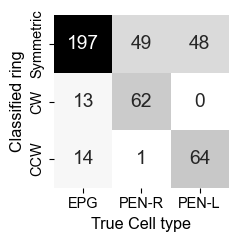

In [ ]:
stat_df = pd.read_csv(FLY_RESULT_PATH / "lm_PB_roi_netcosdif.csv")
confusion_matrix = pd.crosstab(stat_df['ring_bonf'], stat_df['cell_type_s'])
confusion_matrix.columns.name = 'True Cell type'
confusion_matrix.index = ['Symmetric', 'CW', 'CCW']

fig, ax = plt.subplots(1,1, figsize=(2.5,2.5))

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="Greys", cbar=False, ax=ax, annot_kws={"size": axtitle_size})
ax.set_xticks([0.5,1.5,2.5], ['EPG', 'PEN-R', 'PEN-L'])
ax.set_ylabel('Classified ring')

plt.tight_layout()
fig.savefig("../../../Pictures/srcfig2_2_drosophila_classification_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# Fig 2g

C:\Users\15824\AppData\Local\Temp\ipykernel_8988\2738072620.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(stat_summary, x='ring_bonf', y='correctness', errorbar="se", edgecolor='black', ax=ax, capsize=0.1, alpha=0.5, palette=color_mapping)


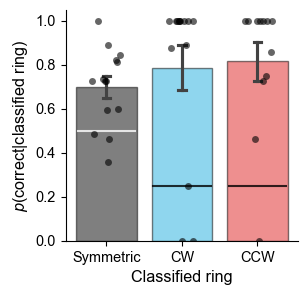

In [ ]:
stat_df = pd.read_csv(FLY_RESULT_PATH / "lm_PB_roi_netcosdif.csv")
stat_df['correctness'] = (  (stat_df['ring_bonf'] == 'left') & (stat_df['cell_type_s'] == 'PEN_L')  |
                            (stat_df['ring_bonf'] == 'right') & (stat_df['cell_type_s'] == 'PEN_R')  |
                            (stat_df['ring_bonf'] == 'central') & (stat_df['cell_type_s'] == 'EPG')).astype(int)

stat_summary = stat_df.groupby(['fly_id', 'ring_bonf']).agg({'correctness': 'mean'}).reset_index()
stat_summary['fly_id'] = stat_summary['fly_id'].astype(int)

color_mapping = {'left': 'deepskyblue', 'right': 'red', 'central': 'Black'}
fig, ax = plt.subplots(1, 1, figsize=(3, 3))

sns.barplot(stat_summary, x='ring_bonf', y='correctness', errorbar="se", edgecolor='black', ax=ax, capsize=0.1, alpha=0.5, palette=color_mapping)
sns.stripplot(
    x="ring_bonf", 
    y="correctness", 
    data=stat_summary, dodge=True, alpha=0.6, ax=ax, color='black', jitter=0.2
)

ax.set_ylabel('$p$(correct|classified ring)')
ax.plot([-0.38,0.38], [0.5]*2, color='white', alpha=0.8)
for i in range(1,3):
    ax.plot([-0.38+i,0.38+i], [0.25]*2, color='black', alpha=0.8)
    
ax.set_xticks([0,1,2], ['Symmetric', 'CW', 'CCW'])
ax.set_xlabel('Classified ring')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig("../../../Pictures/srcfig2_4_classification_precision.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from scipy.stats import wilcoxon

prob_sym = stat_summary[stat_summary.ring_bonf == 'central'].correctness.values
stat, p_val = wilcoxon(prob_sym - 0.5, alternative='greater')
print(f'Symmetric Ring, stat: {stat}, N: {len(prob_sym)}, p-value: {p_val}')

for ring_bonf in ['left', 'right']:
    prob_ring = stat_summary[stat_summary.ring_bonf == ring_bonf].correctness.values - 0.25
    prob_ring = prob_ring[prob_ring != 0]
    
    stat, p_val = wilcoxon(prob_ring, alternative='greater', zero_method='wilcox', method='exact')
    print(f'{ring_bonf} Ring, stat: {stat}, N: {len(prob_ring)}, p-value: {p_val}')

Symmetric Ring, stat: 97.0, N: 14, p-value: 0.00152587890625
left Ring, stat: 88.0, N: 13, p-value: 0.0006103515625
right Ring, stat: 76.0, N: 12, p-value: 0.000732421875


In [ ]:
stat_summary.groupby('ring_bonf')['correctness'].mean().reset_index()

,ring_bonf,correctness
0,central,0.698835
1,left,0.786706
2,right,0.816330


# Fig 3c

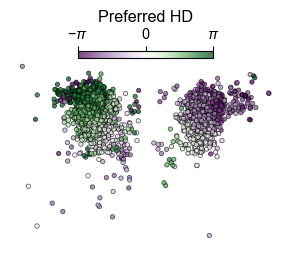

In [ ]:
stat_df = pd.read_pickle(FISH_RESULT_PATH / "ruben_lm_result_cos.pkl")
# Create the scatter plot
fig, ax = plt.subplots(figsize=(3.5, 3.5))

# Create scatter plot with PRGn colormap
scatter = plt.scatter(stat_df.x, stat_df.y, 
                     c=stat_df.preferred_angle, 
                     cmap='PRGn',
                     alpha=0.7,
                     s=10,
                     edgecolors='black',
                     linewidth=0.5)

cbar = plt.colorbar(scatter, location='top', shrink=0.5, aspect=20, pad=0)
cbar.set_label('Preferred HD', fontsize=label_size)
cbar.set_ticks([-np.pi,0,np.pi])
cbar.set_ticklabels(['$-\\pi$', '0', '$\\pi$'])

for spine in ax.spines:
    ax.spines[spine].set_visible(False)
    
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

fig.savefig("../../../Pictures/srcfig3_1_preferred_HD_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

# Fig 3e

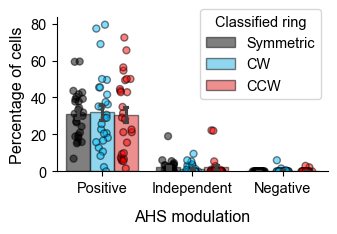

In [ ]:
stat_df = pd.read_pickle(FISH_RESULT_PATH / "ruben_lm_result_cos.pkl")
stat_df['speed_modu'] = stat_df['speed_modu'].map({'Increase': 'Positive', 'Decrease': 'Negative', 'None': 'Independent'})
stat_df['ring'] = stat_df['ring'].map({'left': 'CW', 'right': 'CCW', 'center': 'Symmetric'})

prop = stat_df.groupby(['fish', 'ring']).speed_modu.value_counts()
prop = pd.DataFrame(prop).reset_index()
totoal_num = stat_df.groupby(['fish'], observed=False).agg(total_num=('speed_modu', 'count')).reset_index()
prop = prop.merge(totoal_num, on=['fish'])
prop['proportion'] = prop['count']/prop['total_num'] * 100

color_map = {'CW': 'deepskyblue', 'CCW': 'red', 'Symmetric': 'Black'}
fig, ax = plt.subplots(1, 1, figsize=(3.5, 2))

sns.stripplot(
    x="speed_modu", 
    y="proportion", 
    hue='ring', palette=color_map, edgecolor='black', linewidth=1,
    data=prop, dodge=True, alpha=0.5, ax=ax, jitter=0.2, legend=False, zorder=2,
)

sns.barplot(prop, x='speed_modu', y='proportion', hue='ring', palette=color_map,
            errorbar="se", edgecolor='black', ax=ax, capsize=0.1, alpha=0.5, zorder=1)

ax.set_xlabel('AHS modulation', labelpad=10)
ax.set_ylabel('Percentage of cells')
ax.legend(loc='upper right', frameon=True, bbox_to_anchor=(1, 1.1), title='Classified ring')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig("../../../Pictures/srcfig3_2_movement_modulation.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from scipy.stats import ttest_rel
prop2 = stat_df.groupby(['fish']).ring.value_counts(normalize=True).unstack(fill_value=0)

print(prop2.mean())
print(prop2.std())

res = ttest_rel(prop2.Left, prop2.Right)
print(f"t={res.statistic}, p={res.pvalue}")

res = ttest_rel(prop2.Left, prop2.Symmetric)
print(f"t={res.statistic}, p={res.pvalue}")

res = ttest_rel(prop2.Right, prop2.Symmetric)
print(f"t={res.statistic}, p={res.pvalue}")

ring
Symmetric    0.332612
Left         0.336737
Right        0.330651
dtype: float64
ring
Symmetric    0.132115
Left         0.201797
Right        0.197308
dtype: float64
t=0.08396965225228713, p=0.9337237623644087
t=0.07703322245947936, p=0.9391868619585073
t=-0.03796739873147728, p=0.9700037004055911


# Fig 3f

In [ ]:
# Read and combine acv and stat information
data_df = pd.read_pickle(FISH_RESULT_PATH / "ruben_data_timeseries_cos.pkl")
stat_df = pd.read_pickle(FISH_RESULT_PATH / "ruben_lm_result_cos.pkl")
stat_df_sup = stat_df[['fish', 'cell', 'ring']]
data_df = pd.merge(data_df, stat_df_sup, on=['fish', 'cell'], how='left')

from HD_utils.HD_functions import subtract_preferred_HD_activity
data_df = subtract_preferred_HD_activity(data_df, stat_df)

# bin AHV
print(np.quantile(data_df.angVel, [0.01,0.05,0.1,0.9,0.95,0.99]))
nbins = 21
vlimit = np.mean(np.abs(np.quantile(data_df.angVel, [1/(nbins+2), 1-1/(nbins+2)])))
print(vlimit)
angVel_bin_edge = np.linspace(-vlimit, vlimit, nbins+1)

data_df['angVel_bin'] = np.digitize(data_df.angVel, angVel_bin_edge)

# calculate average acv per bin, normalized by the acv of zero speed
data_sum = data_df.groupby(['fish', 'ring', 'angVel_bin'], observed=True).agg({'activity_subtract': 'mean'}).reset_index()
data_sum2 = data_df.loc[data_df.angVel_bin == (nbins+1)//2].groupby(['fish', 'ring'], observed=True).agg({'activity_subtract': 'mean'}).reset_index()
data_sum2 = data_sum2[['fish', 'ring', 'activity_subtract']]
data_sum = pd.merge(data_sum, data_sum2, on=['fish', 'ring'], how='left', suffixes=('', '_mean'))
data_sum['activity_norm'] = data_sum["activity_subtract"] / data_sum["activity_subtract_mean"]

[-0.09740035 -0.03499959 -0.00819275  0.00647414  0.02796959  0.08082734]
0.03725455596208712


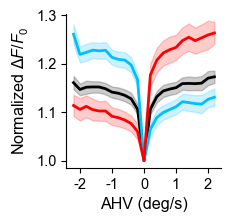

In [ ]:
bin_centers = (angVel_bin_edge[:-1] + angVel_bin_edge[1:]) / 2
bin_centers = np.round(bin_centers / np.pi*180).astype(int)

color_mapping = {'Left': 'deepskyblue', 'Right': 'red', 'Symmetric': 'Black'}
data_sum.ring = data_sum.ring.replace({'center': 'Symmetric', 'left': 'Left', 'right': 'Right'})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2, 2))
sns.lineplot(data=data_sum, x='angVel_bin', y='activity_norm', hue='ring', errorbar='se', ax=ax, palette=color_mapping, markers='.', lw=2, legend=False)

ax.set_xlabel('AHV (deg/s)')
ax.set_xticks(np.arange(1,nbins+1)[::5], bin_centers[::5])

ax.set_ylabel('Normalized $\\Delta F/F_0$')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.legend(loc='upper center', frameon=True, bbox_to_anchor=(0.5,1.25))
# ax.set_ylim([1, 1.5])

fig.savefig("../../../Pictures/srcfig3_3_mean_fish_acv_on_AHV.png", dpi=300, bbox_inches='tight')
plt.show()

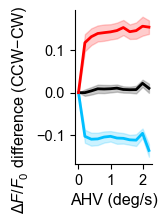

In [ ]:
for i in range((nbins+1)//2,nbins+2):
    df = data_sum
    bol_p = data_sum.angVel_bin == i
    bol_n = data_sum.angVel_bin == nbins+1-i
    try:
        df.loc[bol_p,'acv_diff'] = df.loc[bol_p, 'activity_norm'].values - df.loc[bol_n, 'activity_norm'].values
    except: # if some fly don't have velocity at a specific AHV
        for fish in df.fish.unique():
            fish_bol = df.fish == fish
            try:
                df.loc[bol_p & fish_bol, 'acv_diff'] = df.loc[bol_p & fish_bol, 'activity_norm'].values - df.loc[bol_n & fish_bol, 'activity_norm'].values
            except:
                pass
    
color_mapping = {'Left': 'deepskyblue', 'Right': 'red', 'Symmetric': 'Black'}

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(1, 2))

sns.lineplot(data=df.loc[df.angVel_bin >= nbins//2+1], x='angVel_bin', y='acv_diff', hue='ring', errorbar='se', n_boot=1000, ax=ax, palette=color_mapping, lw=2, legend=False)

ax.set_ylabel('$\\Delta F/F_0$ difference (CCW$-$CW)           ')

ax.set_xlabel('AHV (deg/s)')
ax.set_xticks([11, 16, 21], [0, 1, 2])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.legend(loc='lower left')

fig.savefig("../../../Pictures/srcfig3_3_mean_fish_acv_diff_on_AHV.png", dpi=300, bbox_inches='tight')
plt.show()

# Fig 3g

In [ ]:
# Simulation theta precision
theta_num = 50
dtheta = (2*np.pi)/theta_num
theta_range = np.arange(-np.pi+dtheta/2, np.pi, dtheta) # must use np.arange(-np.pi+dtheta/2, np.pi, dtheta) to make it symmetry
# Changeable parameters
ring_num = 3
actfun = max0x
weight_fun = vonmises_weight_2i1r_2
search_pars = {'JI': np.linspace(-50,0,6), 'JE': np.linspace(0,50,6), 'K0': np.linspace(-50,0,6), 'kappa': np.logspace(-0.2,1,6)}
file_pre_name = 'new_12'
# Default parameters
inputs = np.array([-1, -0.6, -0.3, -0.1, 0, 0.1, 0.3, 0.6, 1])
net_diff_equa = net_diff_equa_f_in
phi = -np.pi * 8/9
tau = 20 # ms
b0 = 1
bc = 1
# Generated parameters
par_num = len(search_pars)
search_num = len(ParameterGrid(search_pars))
zeroid = np.where(inputs == 0)[0][0]
par_names = list(search_pars.keys())
input_num = len(inputs)

network_evals, network_evaldes, network_acvs, network_pars, network_ts = load_pickle(
    ['evals', 'eval_des', 'acvs', 'pars', 'ts'], weight_fun, actfun, '90')
valid_index_s = np.where(network_evals == 'valid')[0]
valids_num = len(valid_index_s)

Vels, network_eval_moving, network_vvcor, network_acvs_moving, network_ts_moving, network_eval_moving_sum = load_pickle(
    ['moving_slope', 'moving_eval', 'moving_eval_des', 'moving_acvs', 'moving_ts', 'moving_eval_sum'], weight_fun, actfun, file_pre_name)

stable_mov_range, stable_mov_range_id, linear_mov_range, linear_mov_range_id = \
    cal_linear_range(network_eval_moving, Vels, inputs, valid_index_s)
valid_index_linear_move = np.where(np.diff(linear_mov_range_id, axis=1) == 8)[0]

uf_mm = np.zeros((4, search_num, len(inputs), ring_num)) # mean_u, max_u, mean_f, max_f
for valid_id in valid_index_linear_move:
    for ratioi, ratiov in enumerate(inputs):
        anet_acv = network_acvs_moving[valid_id, ratioi][:,:,-1] # (ring, cell)
        anet_acv += steady_inputb_2rr_b_increase(bc, b0, ratiov, theta_num).reshape((ring_num, theta_num))
        
        uf_mm[0,valid_id, ratioi] = np.mean(anet_acv, axis=1)
        uf_mm[1,valid_id, ratioi] = np.max(anet_acv, axis=1)
        uf_mm[2,valid_id, ratioi] = np.mean(actfun(anet_acv), axis=1)
        uf_mm[3,valid_id, ratioi] = np.max(actfun(anet_acv), axis=1)

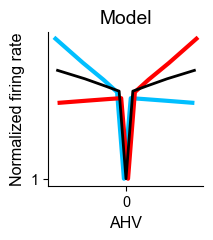

In [ ]:
net_id = 1043

a_colors = ['black', 'deepskyblue', 'red']
a_labels = ['Relay', 'Left', 'Right']

fig, ax = plt.subplots(1,1, figsize=(2,2), sharex=True)
inputs_add = [-0.0,-0.03,0.03]

lws = [2,3,3]

for j in [1,2,0]:
    data_plot = uf_mm[2,net_id,:,j].copy()
    ax.plot(inputs+inputs_add[j], data_plot/data_plot[4], color=a_colors[j], label=a_labels[j], lw=lws[j])
ax.set_xlabel('AHV')

ax.set_ylabel('Normalized firing rate')

ax.set_yticks([1])
ax.set_xticks([0])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Model')

fig.savefig("../../../Pictures/srcfig3_9_zebrafish_model_acv_on_AHV.png", dpi=300, bbox_inches='tight')
plt.show()

# Fig 3h

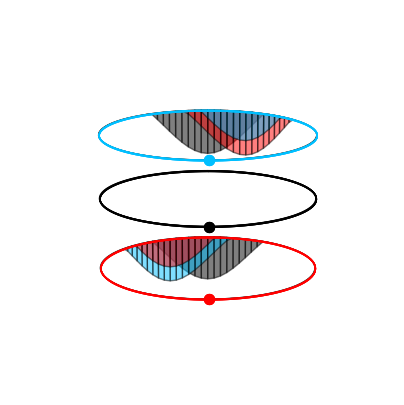

In [ ]:
[network_pars] = load_pickle(['pars'], vonmises_weight_2i1r_2, max0x, '90')
net_id = 1174
net_par = network_pars[net_id]
phi_shift = np.pi * 8/9

data_num = 101
theta = np.linspace(-np.pi, np.pi, data_num)
def weight_fun(add):
    return vonmises_weight_2i1r_2(*net_par, phi_shift, data_num, theta)[:,(data_num-1)//2+add]


a_colors = ['black', 'deepskyblue', 'red']
cell_colors = ['black', 'deepskyblue', 'red']
shift = [0,0,0]

blue_rgb = mcolors.to_rgb('deepskyblue') 
red_rgb = mcolors.to_rgb('red')          
mixed_rgb = tuple((b + r) / 2 for b, r in zip(blue_rgb, red_rgb))

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

zlimt = 60
ax.set_zlim(-zlimt,zlimt)
# baselines = [zlimt*0.7,0,-zlimt*0.78]
baselines = [0,zlimt*0.7,-zlimt*0.78]
adds_num = np.linspace(0,2*data_num, 3).astype(int)

for i, add in enumerate(adds_num):
    atheta = theta + shift[i]
    x = np.cos(atheta)
    y = np.sin(atheta)
    
    zs = weight_fun(add)
    plot_order = [0,1,2] if i == 2 else [0,2,1]
    
    for j in plot_order:
        
        add2 = adds_num[j]
        z = zs[add2:data_num+add2]
        acolor = a_colors[j]
        alpha_val = 0.5
        ax.fill_between(x,y,z+baselines[i],x,y,baselines[i], alpha=alpha_val, edgecolor='k', facecolors=acolor, mode='quad', shade=False)
        ax.scatter(np.cos(shift[i])+0.01,np.sin(shift[i])+0.01,baselines[i], marker='o', c=cell_colors[i], s=50)
        ax.fill_between(x,y,baselines[i]-0.2,x,y,baselines[i]+0.2, 
                        edgecolor=cell_colors[i], facecolors=cell_colors[i], mode="polygon", zorder=100)

ax.grid(False)
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_ticks([])
    axis.pane.set_visible(False)
    axis.line.set_color((0, 0, 0, 0))

ax.view_init(elev=15, azim=0)
fig.savefig("../../../Pictures/srcfig3_10_zebrafish_model_weight.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# Fig 3i

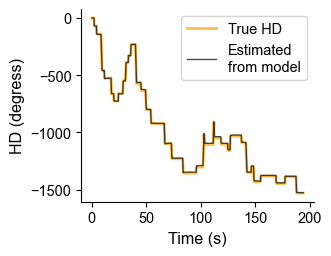

In [ ]:
sim_prefix = 'new13_'
net_phase = np.load(SIM_RESULT_PATH / (sim_prefix + 'a_net_phase.npy'))
true_HD = np.load(SIM_RESULT_PATH / (sim_prefix + 'a_traj.npy'))

fig, ax = plt.subplots(figsize=(3, 2.5))

t = np.arange(len(true_HD)) * 0.2
ax.plot(t, true_HD/np.pi*180, label='True HD', lw=2, alpha=0.7, c='orange')
ax.plot(t, net_phase/np.pi*180, label='Estimated\nfrom model', lw=1, alpha=0.7, c='k')
ax.set_xlabel('Time (s)')
# ax.set_xticks([])
ax.set_ylabel('HD (degress)')
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig("../../../Pictures/srcfig3_11_model_tracking_performance.png", dpi=300, bbox_inches='tight')
plt.show()

# Fig 3j

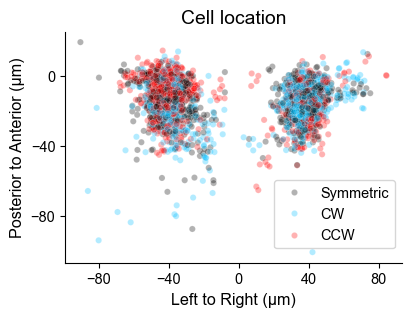

In [ ]:

stat_df = pd.read_pickle(FISH_RESULT_PATH / "ruben_lm_result_cos.pkl")
color_map = {'CW': 'deepskyblue', 'CCW': 'red', 'Symmetric': 'black'}
stat_df.ring = stat_df.ring.cat.rename_categories({'center': 'Symmetric', 'left': 'CW', 'right': 'CCW'})

fig, ax = plt.subplots(1, 1, figsize=(4.5,3))
ax.set_title('Cell location')

stat_df = stat_df.sample(frac=1, random_state=1)
g = sns.scatterplot(stat_df, x='x', y='y', hue='ring', ax=ax, 
                      palette=color_map, 
                      alpha=0.3, s=20)

ax.legend(loc='lower right', bbox_to_anchor=(1,0.03))
for pos in ['top', 'right']:
    ax.spines[pos].set_visible(False)
ax.set_aspect('equal')
ax.set_ylabel('Posterior to Anterior (µm)')
ax.set_xlabel('Left to Right (µm)')
ax.set_yticks(np.arange(-80, 20, 40))
ax.set_xticks(np.arange(-80, 81, 40))

fig.savefig("../../../Pictures/srcfig3_4_HD_ring_location.png", dpi=300, bbox_inches='tight')
plt.show()

# Fig 3j I

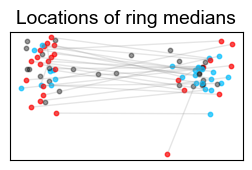

In [ ]:
stat_df = pd.read_pickle(FISH_RESULT_PATH / "ruben_lm_result_cos.pkl")
color_map = {'Left': 'deepskyblue', 'Right': 'red', 'Symmetric': 'black'}
stat_df.ring = stat_df.ring.cat.rename_categories({'center': 'Symmetric', 'left': 'Left', 'right': 'Right'})
stat_df_sum = stat_df.groupby(['fish', 'ring'], observed=True)[['x', 'y', 'z']].median().reset_index()

fig, ax = plt.subplots(1, 1, figsize=(3,3))
for fish in stat_df.fish.unique():
    df_fish = stat_df_sum[stat_df_sum.fish == fish]
    
    df_ring = df_fish.loc[df_fish.ring == 'Left']
    left_x = df_ring.x.values[0]
    left_y = df_ring.y.values[0]

    df_ring = df_fish.loc[df_fish.ring == 'Right']
    right_x = df_ring.x.values[0]
    right_y = df_ring.y.values[0]
    
    df_ring = df_fish.loc[df_fish.ring == 'Symmetric']
    sx = df_ring.x.values[0]
    sy = df_ring.y.values[0]
    
    ax.plot([left_x, right_x], [left_y, right_y], marker='o', label=fish, alpha=0.2, c='grey', markersize=0, lw=1)
    ax.scatter(sx, sy, color='black', alpha=0.4, label='Symmetric', s=10)
    ax.scatter(left_x, left_y, color='deepskyblue', alpha=0.7, label='left', s=10)
    ax.scatter(right_x, right_y, color='red', alpha=0.7, label='right', s=10)

# ax.text(-52,-45, 'Ring median location', fontsize=label_size)
ax.set_title('Locations of ring medians')
    
ax.set_aspect('equal')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yticks([])
ax.set_xticks([])

fig.savefig("../../../Pictures/srcfig3_4_HD_ring_location_median.png", dpi=600, bbox_inches='tight')
plt.show()

# Fig 3j II

left_right: t(26) = 2.102, p = 0.046
posterior_anterior: t(26) =-1.608, p = 0.120
ventral_dorsal: t(26) = 1.963, p = 0.061


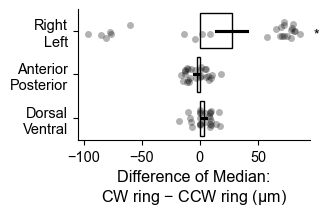

In [ ]:
stat_df = pd.read_pickle(FISH_RESULT_PATH / "ruben_lm_result_cos.pkl")

meandif_df, _ = cal_loc_sep_mean(stat_df, center_stat='median')
meandif_df.rename(columns={'left_right': 'Right\nLeft', 'posterior_anterior': 'Anterior\nPosterior', 'ventral_dorsal': 'Dorsal\nVentral'}, inplace=True)

cm_all, cms = cal_loc_sep_confusion_matrix(stat_df)
fish_ids = stat_df.fish.unique()

fig, ax = plt.subplots(1, 1, figsize=(3, 1.7))

meandif_df_long = pd.melt(meandif_df, id_vars='fish', value_vars=meandif_df)
img = sns.barplot(data=meandif_df_long, y='variable', x='value', ax=ax, errorbar='se', color='black', orient='h', fill=False, linewidth=1)
sns.stripplot(
    y="variable", 
    x="value", 
    data=meandif_df_long, dodge=True, alpha=0.3, ax=ax, jitter=0.2, legend=False, color='black', orient='h'
)

signs = [100,-30,25]
sign_marks = ['*', '', '']
for i in range(3):
    ax.text(signs[i], i+0.08, sign_marks[i], ha='center', va='center')

ax.set_xlabel('Difference of Median:\nCW ring $-$ CCW ring (μm)')
ax.set_ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_yticklabels(['Left-Right', 'Posterior-Anterior', 'Ventral-Dorsal'], rotation=-18, ha='left')

plt.subplots_adjust(wspace=0.6)
fig.savefig("../../../Pictures/srcfig3_5_HD_separation_stat.png", dpi=300, bbox_inches='tight')
plt.show()

# Fig 3l

In [ ]:
stat_df = pd.read_pickle(FISH_RESULT_PATH / "ruben_lm_result_cos.pkl")
cm33s = cal_loc_sep_confusion_matrix_all_ring(stat_df)

prob_lonrs = []
prob_ronls = []
for i, cm in enumerate(cm33s):
    total_num = np.sum(cm)
    prob_lonrs.append( cm[2,1]/total_num - (cm[2,1]+cm[2,0]+cm[2,2])*(cm[2,1]+cm[1,1]+cm[0,1])/total_num**2 ) # ture prob minus expected by independence
    prob_ronls.append( cm[1,2]/total_num - (cm[1,2]+cm[1,1]+cm[1,0])*(cm[1,2]+cm[2,2]+cm[0,2])/total_num**2 )


joint_prob_df = pd.DataFrame({'variable': ['$a$: left ring\n$b$: right side']*len(prob_lonrs) + ['$a$: right ring\n$b$: left side']*len(prob_ronls), 'value': prob_lonrs + prob_ronls})

print(stats.wilcoxon(prob_lonrs))
print(stats.wilcoxon(prob_ronls))

WilcoxonResult(statistic=92.0, pvalue=0.018655240535736084)
WilcoxonResult(statistic=87.0, pvalue=0.013010844588279724)


left_right: t(26) = 2.102, p = 0.046
posterior_anterior: t(26) =-1.608, p = 0.120
ventral_dorsal: t(26) = 1.963, p = 0.061


C:\Users\msy\AppData\Local\Temp\ipykernel_3592\4121132408.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['$i:$CW-ring cell           \n$j:$right side           ', '         $i:$CCW-ring cell\n         $j:$left side'], ha='center', va='top')


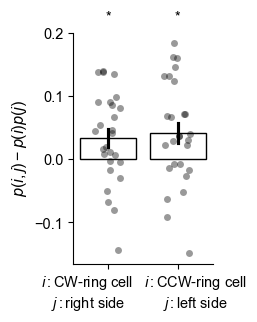

In [ ]:
stat_df = pd.read_pickle(FISH_RESULT_PATH / "ruben_lm_result_cos.pkl")

meandif_df, _ = cal_loc_sep_mean(stat_df, center_stat='median')
meandif_df.rename(columns={'left_right': 'Right', 'posterior_anterior': 'Anterior', 'ventral_dorsal': 'Dorsal'}, inplace=True)

cm_all, cms = cal_loc_sep_confusion_matrix(stat_df)
fish_ids = stat_df.fish.unique()

fig, ax = plt.subplots(1, 1, figsize=(1.8, 3))

img = sns.barplot(data=joint_prob_df, x='variable', y='value', ax=ax, errorbar='se', color='black', fill=False, linewidth=1)
sns.stripplot(
    x="variable", 
    y="value", 
    data=joint_prob_df, dodge=True, alpha=0.4, ax=ax, jitter=0.2, legend=False, color='black'
)

signs = [0.22,0.22]
sign_marks = ['*', '*']
for i in range(2):
    ax.text(i, signs[i], sign_marks[i], ha='center')

ax.set_ylabel('$p(i,j)-p(i)p(j)$')
ax.set_xlabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(['$i:$CW-ring cell           \n$j:$right side           ', '         $i:$CCW-ring cell\n         $j:$left side'], ha='center', va='top')

# plt.tight_layout(w_pad=3)
plt.subplots_adjust(wspace=0.6)
fig.savefig("../../../Pictures/srcfig3_5_2_HD_separation_stat.png", dpi=300, bbox_inches='tight')
plt.show()

# Fig 3m

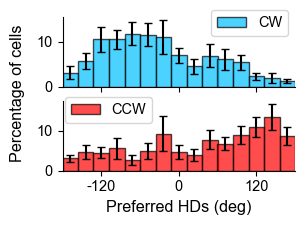

In [ ]:
# Load data
stat_df = pd.read_pickle(FISH_RESULT_PATH / "ruben_lm_result_cos.pkl")
stat_df.ring = stat_df.ring.cat.rename_categories({'center': 'Symmetric', 'left': 'Left', 'right': 'Right'})

bin_num = 15
theta_range = np.linspace(-np.pi, np.pi, bin_num+1)
deg_center = (theta_range[1:] + theta_range[:-1])/2*180/np.pi

color_mapping = {'Left': 'deepskyblue', 'Right': 'red', 'Symmetric': 'Black'}

# Filter out symmetric cells
stat_df_plot = stat_df[stat_df.ring != 'Symmetric']

# Calculate proportions for each fish
fish_proportions = []

for fish_id in stat_df_plot['fish'].unique():  # Assuming there's a fish_id column
    fish_data = stat_df_plot[stat_df_plot['fish'] == fish_id]
    
    for ring_type in ['Left', 'Right']:
        ring_data = fish_data[fish_data.ring == ring_type]
        
        if len(ring_data) > 0:
            # Calculate histogram counts for this fish and ring type
            counts, _ = np.histogram(ring_data['preferred_angle'], bins=theta_range)
            # Convert to proportions
            proportions = counts / len(ring_data)
            
            # Create dataframe for this fish/ring combination
            fish_prop_df = pd.DataFrame({
                'fish_id': fish_id,
                'ring': ring_type,
                'bin_center': deg_center * np.pi / 180,  # Convert back to radians for plotting
                'proportion': proportions
            })
            fish_proportions.append(fish_prop_df)

# Combine all fish data
all_fish_proportions = pd.concat(fish_proportions, ignore_index=True)

# convert proportion to percentage
all_fish_proportions['proportion'] *= 100

# Calculate mean and SEM across fish for each bin and ring type
summary_stats = all_fish_proportions.groupby(['ring', 'bin_center']).agg({
    'proportion': ['mean', 'sem']
}).reset_index()

# Flatten column names
summary_stats.columns = ['ring', 'bin_center', 'mean_proportion', 'sem_proportion']

# Figure with two subplots in rows
fig, axes = plt.subplots(2, 1, figsize=(3, 2), sharex=True)

# Plot each ring type in separate subplot
labels = ['CW', 'CCW']
for idx, ring_type in enumerate(['Left', 'Right']):
    ax = axes[idx]
    ring_data = summary_stats[summary_stats.ring == ring_type]
    
    # Plot bars with error bars
    width = (theta_range[1] - theta_range[0]) * 1
    ax.bar(ring_data['bin_center'], ring_data['mean_proportion'], 
           width=width, 
           color=color_mapping[ring_type], 
           edgecolor='black',  
           alpha=0.7,
           yerr=ring_data['sem_proportion'],
           capsize=3, # Same color for error bars
           label=labels[idx])
    
    # Add legend
    ax.legend(loc='best')
   
    # Remove top and right spines
    for pos in ['top', 'right']:
        ax.spines[pos].set_visible(False)

ax = axes[1]
ax.set_xlabel('Preferred HDs (deg)')
ax.set_xticks([-np.pi/3*2,0,np.pi/3*2])
ax.set_xticklabels([-120,0,120], ha='center')
ax.set_xlim([-np.pi, np.pi])
ax.legend(bbox_to_anchor=(-0.02,1.15), loc='upper left')

axes[0].legend(bbox_to_anchor=(1,1.2), loc='upper right')


fig.supylabel('Percentage of cells', x=-0.05)

fig.savefig("../../../Pictures/srcfig3_6_HD_angle_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

# Fig 3n

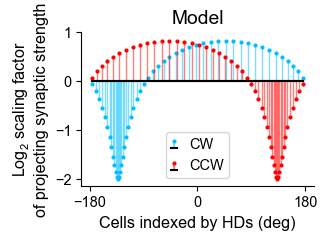

In [ ]:
theta_num = 50
dtheta_sym = (2*np.pi) / theta_num
theta_range_sym = np.arange(-np.pi+dtheta_sym/2, np.pi, dtheta_sym)


fig, ax = plt.subplots(figsize=(3,2))
ax.set_title('Model')

shifts = [-np.pi/2, np.pi/2]
colors = ['deepskyblue', 'red']
labels = ['CW', 'CCW']
for i in range(2):
    dtheta, theta_range = ueHD.asy_theta_range(theta_range_sym, shifts[i])
    markerline, stemlines, baseline = ax.stem(theta_range/np.pi*180, np.log2(dtheta/dtheta_sym), label=labels[i])

    plt.setp(stemlines, 'linewidth', 1)  # stem width
    stemlines.set_color(colors[i])
    stemlines.set_alpha(0.5)
    
    plt.setp(markerline, 'markersize', 2)  # dot size
    markerline.set_color(colors[i])
    
    baseline.set_color('black')

ax.legend(handlelength=0.4)

for pos in ['top', 'right']:
    ax.spines[pos].set_visible(False)
    
ax.set_ylabel('Log$_2$ scaling factor\nof projecting synaptic strength')
ax.set_yticks([-2,-1,0,1])

ax.set_xticks([-180,0,180])
ax.set_xlabel('Cells indexed by HDs (deg)')

fig.savefig("../../../Pictures/srcfig3_9_inverse_scale.png", dpi=600, bbox_inches='tight')
plt.show()

# Fig 3o

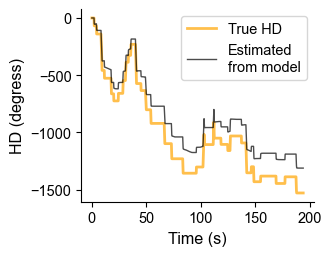

In [ ]:
sim_prefix = 'new_15_3'
net_phase = np.load(SIM_RESULT_PATH / (sim_prefix + 'a_net_phase.npy'))
true_HD = np.load(SIM_RESULT_PATH / (sim_prefix + 'a_traj.npy'))

fig, ax = plt.subplots(figsize=(3, 2.5))

t = np.arange(len(true_HD)) * 0.2
ax.plot(t, true_HD/np.pi*180, label='True HD', lw=2, alpha=0.7, c='orange')
ax.plot(t, (net_phase-net_phase[0])/np.pi*180, label='Estimated\nfrom model', lw=1, alpha=0.7, c='k')
ax.set_xlabel('Time (s)')
# ax.set_xticks([])
ax.set_ylabel('HD (degress)')
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig("../../../Pictures/srcfig3_10_unequalHD_traj.png", dpi=300, bbox_inches='tight')
plt.show()